<a href="https://colab.research.google.com/github/macgyver121/DADS5001/blob/main/Exercise/Midterm_DADS5001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm DADS5001 - COVID Analysis / Sivakorn 6410412012

https://data.go.th/dataset/covid-19-daily
- confirmed-cases.csv
- confirmed-cases-since-120864.csv
- confirmed-cases-since-271064.csv
- confirmed-cases-since-280265.csv

# Data preparation

## Import Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pwd

/content


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/DADS/DADS5001/confirmed-cases.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DADS/DADS5001/confirmed-cases-since-120864.csv')
df3 = pd.read_csv('/content/drive/MyDrive/DADS/DADS5001/confirmed-cases-since-271064.csv')
df4 = pd.read_csv('/content/drive/MyDrive/DADS/DADS5001/confirmed-cases-since-280265.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Check info

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839771 entries, 0 to 839770
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   No.                    839771 non-null  int64 
 1   announce_date          839771 non-null  object
 2   Notified date          836976 non-null  object
 3   sex                    784876 non-null  object
 4   age                    763606 non-null  object
 5   Unit                   763746 non-null  object
 6   nationality            755567 non-null  object
 7   province_of_isolation  839499 non-null  object
 8   risk                   838677 non-null  object
 9   province_of_onset      740737 non-null  object
 10  district_of_onset      680992 non-null  object
dtypes: int64(1), object(10)
memory usage: 70.5+ MB


In [6]:
print(df1['No.'].count() + df2['No.'].count() + df3['No.'].count() + df4['No.'].count())

3111655


## Concatinate Data Frame

In [7]:
df = df1.append((df2,df3,df4))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111655 entries, 0 to 219256
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   No.                    int64  
 1   announce_date          object 
 2   Notified date          object 
 3   sex                    object 
 4   age                    object 
 5   Unit                   object 
 6   nationality            object 
 7   province_of_isolation  object 
 8   risk                   object 
 9   province_of_onset      object 
 10  district_of_onset      object 
 11  Unnamed: 11            float64
dtypes: float64(1), int64(1), object(10)
memory usage: 308.6+ MB


In [9]:
df.tail(5)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,Unnamed: 11
219252,3088869,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,นครพนม,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219253,3088870,9/3/2022,8/3/2022,ชาย,NaN,NaN,Burmese,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219254,3088871,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219255,3088872,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219256,3088873,9/3/2022,8/3/2022,ชาย,29.0,ปี,Burmese,ตาก,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN


## Delete duplicate rows

In [10]:
df['No.'].value_counts()

835077     2
826805     2
826807     2
826808     2
826809     2
          ..
1044816    1
1044817    1
1044818    1
1044819    1
3088873    1
Name: No., Length: 3088873, dtype: int64

In [11]:
df[df['No.'] == 835077]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,Unnamed: 11
835076,835077,12/8/2021,11/8/2021,NaN,63.0,ปี,NaN,กรุงเทพมหานคร,ระบุไม่ได้,กรุงเทพมหานคร,หนองจอก,NaN
18087,835077,12/8/2021,11/8/2021,NaN,63.0,ปี,NaN,กรุงเทพมหานคร,ระบุไม่ได้,กรุงเทพมหานคร,หนองจอก,NaN


In [12]:
df = df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3088874 entries, 0 to 219256
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   No.                    int64  
 1   announce_date          object 
 2   Notified date          object 
 3   sex                    object 
 4   age                    object 
 5   Unit                   object 
 6   nationality            object 
 7   province_of_isolation  object 
 8   risk                   object 
 9   province_of_onset      object 
 10  district_of_onset      object 
 11  Unnamed: 11            float64
dtypes: float64(1), int64(1), object(10)
memory usage: 306.4+ MB


## Reset index and Delete unused column

In [14]:
df.tail()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,Unnamed: 11
219252,3088869,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,นครพนม,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219253,3088870,9/3/2022,8/3/2022,ชาย,NaN,NaN,Burmese,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219254,3088871,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219255,3088872,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219256,3088873,9/3/2022,8/3/2022,ชาย,29.0,ปี,Burmese,ตาก,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN


In [15]:
df = df.reset_index()

In [16]:
df.tail()

,index,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,Unnamed: 11
3088869,219252,3088869,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,นครพนม,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
3088870,219253,3088870,9/3/2022,8/3/2022,ชาย,NaN,NaN,Burmese,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
3088871,219254,3088871,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
3088872,219255,3088872,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
3088873,219256,3088873,9/3/2022,8/3/2022,ชาย,29.0,ปี,Burmese,ตาก,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN


In [17]:
del df['Unnamed: 11']

In [18]:
del df['index']

In [19]:
df.tail(5)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
3088869,3088869,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,นครพนม,ทัณฑสถาน/เรือนจำ,NaN,NaN
3088870,3088870,9/3/2022,8/3/2022,ชาย,NaN,NaN,Burmese,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
3088871,3088871,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
3088872,3088872,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
3088873,3088873,9/3/2022,8/3/2022,ชาย,29.0,ปี,Burmese,ตาก,ทัณฑสถาน/เรือนจำ,NaN,NaN


In [20]:
df.shape

(3088874, 11)

## check null

In [21]:
df.isnull().sum()

No.                           0
announce_date                 0
Notified date              2795
sex                      168699
age                      255532
Unit                     275704
nationality              266361
province_of_isolation      3956
risk                       1174
province_of_onset        376428
district_of_onset        481628
dtype: int64

## cleaning Data [announce_date]

In [22]:
df['announce_date'].iloc[0:3]

0    12/1/2020
1    17/1/2020
2    22/1/2020
Name: announce_date, dtype: object

In [23]:
df['new_date'] = pd.to_datetime(df['announce_date'], format='%d/%m/%Y')

In [24]:
df['new_date'].head()

0   2020-01-12
1   2020-01-17
2   2020-01-22
3   2020-01-22
4   2020-01-24
Name: new_date, dtype: datetime64[ns]

In [25]:
df['new_date'].max()

Timestamp('2022-03-09 00:00:00')

In [26]:
df['new_date'].min()

Timestamp('2020-01-12 00:00:00')

## cleaning Data [sex]

In [27]:
df['sex'].value_counts()

หญิง      1535158
ชาย       1384994
นาย             9
หญิิง           5
ช               3
 หญิง           1
ร.ต.ท.          1
หห              1
หญง             1
ญ               1
หณิง            1
Name: sex, dtype: int64

In [28]:
df['sex'] = df['sex'].str.strip()

In [29]:
df['sex'] = df['sex'].replace(['นาย','ช','ร.ต.ท.'], 'ชาย')

In [30]:
df['sex'] = df['sex'].replace(['หญิิง','หห','หญง','ญ','หณิง'], 'ชาย')

In [31]:
df['sex'].value_counts()

หญิง    1535159
ชาย     1385016
Name: sex, dtype: int64

## cleaning Data [age]

In [32]:
#age = df['age'].unique()

In [33]:
df[df['age'] == '55/664']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new_date
100164,100165,16/5/2021,15/5/2021,หญิง,55/664,NaN,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,เมือง,2021-05-16


In [34]:
df[df['age'] == '35/11']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new_date
2597654,2597654,14/2/2022,13/2/2022,หญิง,35/11,NaN,Thailand,ประจวบคีรีขันธ์,อยู่ระหว่างการสอบสวน,ประจวบคีรีขันธ์,บางสะพาน,2022-02-14


### delete row that age = 55/664, 35/11

In [35]:
df = df.drop(100164)
df = df.drop(2597654)

In [36]:
df['age'] = df['age'].astype(float)

### delete row that age more than 122 (highest human age in the world)

In [37]:
df['age'].max()

44899.0

In [38]:
df[df['age'] > 122]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new_date
135366,135367,25/5/2021,24/5/2021,ชาย,440.0,ปี,Myanmar,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,ยานนาวา,2021-05-25
2242008,2242008,6/1/2022,5/1/2022,ชาย,158.0,ปี,Chinese,ชลบุรี,อยู่ระหว่างการสอบสวน,ชลบุรี,บางละมุง,2022-01-06
2252849,2252849,8/1/2022,7/1/2022,หญิง,2021.0,NaN,NaN,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,แม่แตง,2022-01-08
2273864,2273864,10/1/2022,9/1/2022,หญิง,149.0,NaN,Thailand,เลย,อื่นๆ,เลย,ท่าลี่,2022-01-10
2434821,2434821,31/1/2022,30/1/2022,หญิง,330.0,NaN,Thailand,สมุทรสาคร,อื่นๆ,สมุทรสาคร,เมืองสมุทรสาคร,2022-01-31
2498484,2498484,7/2/2022,6/2/2022,หญิง,143.0,ปี,Thailand,นนทบุรี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นนทบุรี,บางบัวทอง,2022-02-07
2609926,2609926,15/2/2022,14/2/2022,หญิง,44899.0,NaN,Thailand,สระบุรี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สระบุรี,บ้านหมอ,2022-02-15
2809281,2809281,25/2/2022,24/2/2022,หญิง,241.0,NaN,NaN,นครพนม,อื่นๆ,นครพนม,เมืองนครพนม,2022-02-25
2822589,2822589,26/2/2022,25/2/2022,ชาย,125.0,NaN,Thailand,นนทบุรี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นนทบุรี,เมืองนนทบุรี,2022-02-26
2850857,2850857,27/2/2022,26/2/2022,ชาย,146.0,NaN,Thailand,นครปฐม,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครปฐม,นครชัยศรี,2022-02-27


In [39]:
index_age_error = df[df['age'] > 122].index

In [40]:
df = df.drop(index_age_error)

In [41]:
df['age'].sort_values(ascending = False)

2817984    122.0
2818226    122.0
2273204    121.0
2359668    121.0
1800435    119.0
           ...  
3088868      NaN
3088869      NaN
3088870      NaN
3088871      NaN
3088872      NaN
Name: age, Length: 3088862, dtype: float64

### Round down (floor) 

In [42]:
df['age'].value_counts()

25.000000    70648
26.000000    69350
24.000000    68944
30.000000    67919
27.000000    67691
             ...  
54.199525        1
54.240166        1
54.280807        1
54.321448        1
4.300000         1
Name: age, Length: 1215, dtype: int64

In [43]:
df['age'] = df['age'].apply(np.floor)

### check value

In [44]:
df['age'].value_counts()

25.0     70648
26.0     69350
24.0     68944
30.0     67919
27.0     67691
         ...  
122.0        2
114.0        1
109.0        1
112.0        1
118.0        1
Name: age, Length: 118, dtype: int64

## cleaning Data [unit]

In [45]:
df['Unit'] = df['Unit'].str.strip()

In [46]:
df['Unit'].value_counts()

ปี       2799770
เดือน      12563
วัน          834
Name: Unit, dtype: int64

### change person that age is month and day to 0 year

In [47]:
unit_md_index = df[df['Unit'].isin(['เดือน', 'วัน'])].index

In [48]:
df.loc[unit_md_index, 'age'] = 0

In [49]:
df[df['Unit'].isin(['เดือน', 'วัน'])]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new_date
301,302,20/3/2020,NaN,ชาย,0.0,เดือน,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,เมือง,2020-03-20
1076,1077,27/3/2020,26/3/2020,ชาย,0.0,เดือน,Thailand,สุราษฎร์ธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุราษฎร์ธานี,กาญจนดิษฐ์,2020-03-27
1676,1677,1/4/2020,31/3/2020,ชาย,0.0,เดือน,Japan,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,NaN,2020-04-01
1988,1989,4/4/2020,3/4/2020,ชาย,0.0,เดือน,Thailand,ระยอง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ระยอง,บ้านฉาง,2020-04-04
3507,3508,22/9/2020,21/9/2020,ชาย,0.0,เดือน,India,กรุงเทพมหานคร,ผู้ที่เดินทางมาจากต่างประเทศ และเข้า ASQ/ALQ,กรุงเทพมหานคร,พระนคร,2020-09-22
...,...,...,...,...,...,...,...,...,...,...,...,...
3085033,3085033,9/3/2022,8/3/2022,ชาย,0.0,เดือน,Thailand,สตูล,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สตูล,เมืองพิมาน,2022-03-09
3085108,3085108,9/3/2022,8/3/2022,หญิง,0.0,เดือน,Thailand,สตูล,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สตูล,ควนโดน,2022-03-09
3085116,3085116,9/3/2022,8/3/2022,หญิง,0.0,เดือน,Thailand,สตูล,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สตูล,ควนโดน,2022-03-09
3085120,3085120,9/3/2022,8/3/2022,หญิง,0.0,เดือน,Thailand,สตูล,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สตูล,ควนโดน,2022-03-09


In [50]:
df.loc[unit_md_index, 'Unit'] = 'ปี'

In [51]:
df['Unit'].value_counts()

ปี    2813167
Name: Unit, dtype: int64

## cleaning Data [nationality]

### setting show all data 

In [52]:
pd.set_option("display.max_rows", None)

In [53]:
df['nationality'].value_counts()

Thailand                    2576150
Burmese                      131716
Cambodian                     38043
Thai                          20632
Burma                         18759
Laotian / Lao                  8790
Russian                        3554
Chinese                        1826
British / English              1479
American                       1197
German                         1153
Indian                         1098
French                         1089
Cambodia                        854
Japanese                        805
Laos                            780
Australian                      659
Swedish                         635
Filipino                        606
Kazakh / Kazakhstani            593
Israeli                         486
Dutch                           464
Danish                          414
cambodian                       399
Other                           381
burmese                         378
British                         356
South Korean                

### change to lower text

In [54]:
df['nationality'] = df['nationality'].str.lower()

### delete white space

In [55]:
df['nationality'] = df['nationality'].str.strip()

In [56]:
df.groupby('nationality').size()

nationality
afghan                            1
afghan / afghani                 14
afghanistan                       3
african                          23
albania                           4
albanian                          9
algeria                           1
algerian                          7
american                       1198
american samoa                    5
americans                         1
arabi                             1
argentina                         2
argentine                         1
argentine / argentinian          18
armenia                           1
armenian                          5
au                                1
australia                        26
australian                      662
austria                           8
austrian                        168
azerbaijan                        5
bahrain                           2
bahraini                         19
bangladesh                       19
bangladeshi                      85
belarus         

### change duplicate data

In [57]:
a = df['nationality'].replace(['afghan / afghani','afghanistan'], 'afghan')
a = a.replace(['albania'], 'albanian')
a = a.replace(['algeria'], 'algerian')
a = a.replace(['american samoa'], 'american samoan')
a = a.replace(['americans','อเมริกา'], 'american')
a = a.replace(['arabi'], 'saudi arabian')
a = a.replace(['argentina', 'argentine / argentinian'], 'argentine')
a = a.replace(['armenia'], 'armenian')
a = a.replace(['au', 'australia'], 'australian')
a = a.replace(['austria'], 'austrian')
a = a.replace(['azerbaijan'], 'azerbaijani')
a = a.replace(['bahrain'], 'bahraini')
a = a.replace(['bangladesh'], 'bangladeshi')
a = a.replace(['belarus'], 'belarusian')
a = a.replace(['belgium'], 'belgian')
a = a.replace(['bermuda'], 'bermudain')
a = a.replace(['bhutan'], 'bhutanese')
a = a.replace(['bosnian/herzegovinian'], 'bosnian')
a = a.replace(['brazil', 'บราซิล'], 'brazilian')
a = a.replace(['british / english', 'british / northern irish', 'british / scottish', 'british / welsh', 'british/english'], 'british')
a = a.replace(['brunei'], 'bruneian')
a = a.replace(['bulgaria'], 'bulgarian')
a = a.replace(['burma', 'myanmar', 'พม่า', 'ไทยใหญ่', 'ไทใหญ่'], 'burmese')
a = a.replace(['cambodia', 'กัมพูชา'], 'cambodian')
a = a.replace(['cameroon'], 'cameroonian')
a = a.replace(['canada'], 'canadian')
a = a.replace(['china', 'จีน'], 'chinese')
a = a.replace(['colombia'], 'colombian')
a = a.replace(['congo', 'congo (brazzaville)'], 'congolese')
a = a.replace(['croatia'], 'croatian')
a = a.replace(['cuba'], 'cuban')
a = a.replace(['czechia'], 'czech')

In [58]:
a = a.replace(['denmark'], 'danish')
a = a.replace(['deutsch'], 'german')
a = a.replace(['netherlands'], 'dutch')
a = a.replace(['egypt'], 'egyptian')
a = a.replace(['emirate', 'uae', 'united arab emirates'], 'emirati')
a = a.replace(['eritrea'], 'eritrean')
a = a.replace(['estonia'], 'estonian')
a = a.replace(['ethiopia'], 'ethiopian')
a = a.replace(['philipines'], 'filipino')
a = a.replace(['finland'], 'finnish')
a = a.replace(['franch', 'french guiana'], 'french')
a = a.replace(['gambia', 'gambia, the'], 'gambian')
a = a.replace(['germany', 'germen', 'gremany'], 'german')
a = a.replace(['ghana'], 'ghanaian')
a = a.replace(['greece'], 'greek')
a = a.replace(['guinea'], 'guinean')
a = a.replace(['hong kong'], 'chinese')
a = a.replace(['hungary'], 'hungarian')
a = a.replace(['iceland'], 'icelandic')
a = a.replace(['india', 'india-thailand'], 'indian')
a = a.replace(['indonesia'], 'indonesian')
a = a.replace(['iran'], 'iranian')
a = a.replace(['iraq'], 'iraqi')
a = a.replace(['ireland'], 'irish')
a = a.replace(['israel'], 'israeli')
a = a.replace(['italy'], 'italian')
a = a.replace(['japan'], 'japanese')
a = a.replace(['jordan'], 'jordanian')

In [59]:
a = a.replace(['kazakhstan', 'kazakh / kazakhstani'], 'kazakh')
a = a.replace(['kenya'], 'kenyan')
a = a.replace(['korea, south', 'korean'], 'south korean')
a = a.replace(['kosovo'], 'kosovan')
a = a.replace(['kuwait'], 'kuwaiti')
a = a.replace(['kyrgyzstan'], 'kyrgyz')
a = a.replace(['l', 'lao', 'laos', 'laotian / lao', 'laotian/lao'], 'laotian')
a = a.replace(['latvia'], 'latvian')
a = a.replace(['liberia'], 'liberian')
a = a.replace(['libya'], 'libyan')
a = a.replace(['lithuania'], 'lithuanian')
a = a.replace(['luxembourg'], 'luxembourgish')
a = a.replace(['macedonia'], 'macedonian')
a = a.replace(['malawi'], 'malawin')
a = a.replace(['malaysia'], 'malaysian')
a = a.replace(['maldives'], 'maldivian')
a = a.replace(['mali'], 'malian')
a = a.replace(['malta'], 'maltese')
a = a.replace(['mauritians', 'mauritius'], 'mauritian')
a = a.replace(['mexico'], 'mexican')
a = a.replace(['mongolia'], 'mongolian')
a = a.replace(['namibia'], 'namibian')
a = a.replace(['nepal', 'nepalese / nepali'], 'nepalese')
a = a.replace(['new zealand'], 'new zealander')
a = a.replace(['nicaragua'], 'nicaraguan')
a = a.replace(['nigeria', 'ไนจีเรีย'], 'nigerian')
a = a.replace(['norway'], 'norwegian')

In [60]:
a = a.replace(['oman'], 'omani')
a = a.replace(['pakistan'], 'pakistani')
a = a.replace(['palestine'], 'palestinian')
a = a.replace(['philippines'], 'filipino')
a = a.replace(['poland'], 'polish')
a = a.replace(['portugal'], 'portuguese')
a = a.replace(['qatar', 'oatari'], 'qatari')
a = a.replace(['romania'], 'romanian')
a = a.replace(['russia'], 'russian')
a = a.replace(['senegal'], 'senegalese')
a = a.replace(['serbia'], 'serbian')
a = a.replace(['sierra leone'], 'sierra leonian')
a = a.replace(['singapore'], 'singaporean')
a = a.replace(['slovak / slovakian'], 'slovak')
a = a.replace(['slovenia', 'slovenian / slovene'], 'slovenian')
a = a.replace(['somali / somalian', 'somalia'], 'somali')
a = a.replace(['south africa'], 'south african')
a = a.replace(['south korea'], 'south korean')
a = a.replace(['spain'], 'spanish')
a = a.replace(['sri lanka'], 'sri lankan')
a = a.replace(['sudan'], 'sudanese')
a = a.replace(['swaziland'], 'swazi')
a = a.replace(['sweden', 'สวีเดน'], 'swedish')
a = a.replace(['switzerland'], 'swiss')
a = a.replace(['syria'], 'syrian')

In [61]:
a = a.replace(['taiwan'], 'taiwanese')
a = a.replace(['tajik'], 'tajikistan')
a = a.replace(['tanzania'], 'tanzanian')
a = a.replace(['thailand'], 'thai')
a = a.replace(['timor-leste'], 'timorese')
a = a.replace(['tunisia'], 'tunisian')
a = a.replace(['turkey', 'turkcish'], 'turkish')
a = a.replace(['uganda'], 'ugandan')
a = a.replace(['ukraine'], 'ukrainian')
a = a.replace(['united kingdom'], 'british')
a = a.replace(['united states of america'], 'american')
a = a.replace(['uzbekistan'], 'uzbek')
a = a.replace(['vietnam'], 'vietnamese')
a = a.replace(['yemen', 'yemeni / yemenite'], 'yemeni')
a = a.replace(['zimbabwe'], 'zimbabwean')
a = a.replace(['ต่างด้าว'], 'other')
a = a.replace(['ลาว'], 'laotian')
a = a.replace(['ไม่มีสัญชาติ'], 'other')
a = a.replace(['ไม่ระบุ'], 'other')

In [62]:
df['nationality'] = a.str.capitalize()
df.groupby('nationality').size()

nationality
Afghan                      18
African                     23
Albanian                    13
Algerian                     8
American                  1334
American samoan              5
Argentine                   21
Armenian                     6
Australian                 689
Austrian                   176
Azerbaijani                  5
Bahraini                    21
Bangladeshi                104
Belarusian                  44
Belgian                    205
Bermudain                    1
Bhutanese                    4
Bosnian                      2
Brazilian                  103
British                   2023
Bruneian                     5
Bulgarian                   54
Burmese                 150934
Cambodian                39311
Cameroonian                 36
Canadian                   295
Chilean                     22
Chinese                   2035
Colombian                   94
Congolese                    2
Cote d'ivoire                3
Croatian                   

use this ref to change nationality https://www.englishclub.com/vocabulary/world-countries-nationality.php

## cleaning Data [province_of_isolation]

In [63]:
pd.set_option("display.max_rows", None)

In [64]:
df.groupby('province_of_isolation').size()

province_of_isolation
กทม                  2557
กระบี่              18315
กรุงเทพมหานคร      593818
กาญจนบุรี           34201
กาฬสินธุ์           18600
กำแพงเพชร           14390
ขอนแก่น             45617
ขอนแก่น                66
จันทบุรี            29194
ฉะเชิงเทรา          51776
ชลบุรี             166861
ชัยนาท               5289
ชัยภูมิ             21084
ชุมพร               23171
ตรัง                22584
ตราด                11573
ตาก                 31422
นครนายก             16337
นครปฐม              53955
นครพนม               9450
นครราชสีมา          57708
นครศรีธรรมราช       75577
นครสวรรค์           25975
นนทบุรี            104542
นราธิวาส            46250
น่าน                 7159
บึงกาฬ               5517
บุรีรัมย์           33949
ปทุมธานี            63113
ประจวบคีรีขันธ์     30044
ปราจีนบุรี          35448
ปัตตานี             53678
พระนครศรีอยุธยา     47936
พะเยา                5455
พังงา               13012
พัทลุง              21794
พิจิตร               7986
พิษณุโลก        

### delete white space

In [65]:
df['province_of_isolation'] = df['province_of_isolation'].str.strip()

### change duplicate data

In [66]:
df['province_of_isolation'] = df['province_of_isolation'].replace(['กทม'], 'กรุงเทพมหานคร')
df['province_of_isolation'] = df['province_of_isolation'].replace(['ภููเก็ต'], 'ภูเก็ต')

In [67]:
df['province_of_isolation'].nunique()

77

In [68]:
pd.set_option("display.max_rows", 7)

In [69]:
df.groupby('province_of_isolation').size()

province_of_isolation
กระบี่            18315
กรุงเทพมหานคร    596375
กาญจนบุรี         34201
                  ...  
เลย                9407
แพร่               5165
แม่ฮ่องสอน         4234
Length: 77, dtype: int64

In [70]:
df['province_of_isolation'].value_counts()

กรุงเทพมหานคร    596375
สมุทรปราการ      189280
ชลบุรี           166861
                  ...  
แพร่               5165
อำนาจเจริญ         5149
แม่ฮ่องสอน         4234
Name: province_of_isolation, Length: 77, dtype: int64

## cleaning Data [risk]

In [71]:
pd.set_option("display.max_rows", None)

### delete white space

In [72]:
df['risk'] = df['risk'].str.strip()

### change to lower text

In [73]:
df['risk'] = df['risk'].str.lower()

In [74]:
df.groupby('risk').size()

risk
10.อื่นๆ                                                                                 88
2.สัมผัสผู้ติดเชื้อ                                                                      92
8.สำรวจกลุ่มเสี่ยง (survey)                                                               1
9.ขอตรวจหาเชื้อเอง                                                                        2
acf รองเมือง                                                                             24
acf สนามกีฬาธูปะเตมีย์                                                                   23
acf สนามกีฬาไทย-ญี่ปุ่น                                                                 135
acf สีลม                                                                                110
acf เคหะหลักสี่                                                                           4
bkk sandbox                                                                              28
chonburi sandbox                                                           

### create new columns for new_risk

In [75]:
# create a list of our conditions
conditions = [
    (df['risk'].str.contains('คนต่างชาติเดินทางมาจากต่างประเทศ', na=False)),
    (df['risk'].str.contains('อาชีพเสี่ยง', na=False)),
    (df['risk'].str.contains('สัมผัส', na=False)),
    (df['risk'].str.contains('acf', na=False)),
    (df['risk'].str.contains('cluster', na=False)),
    (df['risk'].str.contains('sandbox', na=False)),
    (df['risk'].str.contains('shui', na=False)),
    (df['risk'].str.contains('samui plus', na=False)),
    (df['risk'].str.contains('state quarantine', na=False)),
    (df['risk'].str.contains('test and go', na=False)),
    (df['risk'].str.contains('ค้นหา', na=False)),
    (df['risk'].str.contains('ต่างประเทศ', na=False)),
    (df['risk'].str.contains('พื้นที่เสี่ยง', na=False)),
    (df['risk'].str.contains('ตรวจก่อน', na=False)),
    (df['risk'].str.contains('ทัณฑสถาน', na=False)),
    (df['risk'].str.contains('บุคลากร', na=False)),
    (df['risk'].str.contains('ปอด', na=False)),
    (df['risk'].str.contains('ผู้ที่เดินทางมาจากต่างประเทศ', na=False)),
    (df['risk'].str.contains('พิธีกรรมทางศาสนา', na=False)),
    (df['risk'].str.contains('ระบุไม่ได้', na=False)),
    (df['risk'].str.contains('ผู้ต้องกัก', na=False)),
    (df['risk'].str.contains('สถานที่ทำงาน', na=False)),
    (df['risk'].str.contains('สถานบันเทิง', na=False)),
    (df['risk'].str.contains('สถานศึกษา', na=False)),
    (df['risk'].str.contains('สนามมวย', na=False)),
    (df['risk'].str.contains('อยู่ระหว่าง', na=False)),
    (df['risk'].str.contains('เดินทางมาจาก', na=False)),
    (df['risk'].str.contains('ไป', na=False)),
    (df['risk'].str.contains('ไม่ระบุ', na=False))
    ]

# create a list of the values we want to assign for each condition
values = ['ผู้ที่เดินทางมาจากต่างประเทศ','อาชีพเสี่ยง', 'สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้', 'การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน', 'Cluster ตามสถานที่ต่างๆ','Sandbox','Sandbox', 'Sandbox', 'ผู้ที่เดินทางมาจากต่างประเทศ', 'ผู้ที่เดินทางมาจากต่างประเทศ','การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน',
          'ผู้ที่เดินทางมาจากต่างประเทศ', 'ไปสถานที่เสี่ยง', 'ตรวจเชื้อก่อนทำหัตถการ', 'ทัณฑสถาน/เรือนจำ', 'บุคลากรด้านการแพทย์และสาธารณสุข', 'ปอดอักเสบ',
          'ผู้ที่เดินทางมาจากต่างประเทศ', 'พิธีกรรมทางศาสนา', 'ระบุไม่ได้', 'ทัณฑสถาน/เรือนจำ', 'สถานที่ทำงาน','สถานบันเทิง','สถานศึกษา','Cluster ตามสถานที่ต่างๆ',
          'อยู่ระหว่างการสอบสวน', 'ไปสถานที่เสี่ยง', 'ไปสถานที่เสี่ยง', 'ระบุไม่ได้']

# create a new column and use np.select to assign values to it using our lists as arguments
df['new_risk'] = np.select(conditions, values, default = 'อื่นๆ')

# display updated DataFrame
df['new_risk'].value_counts()

สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้         1316242
อื่นๆ                                                865036
อยู่ระหว่างการสอบสวน                                 273641
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน     250288
ทัณฑสถาน/เรือนจำ                                      92684
สถานที่ทำงาน                                          87379
ไปสถานที่เสี่ยง                                       77489
ระบุไม่ได้                                            31783
Cluster ตามสถานที่ต่างๆ                               23007
บุคลากรด้านการแพทย์และสาธารณสุข                       17452
ผู้ที่เดินทางมาจากต่างประเทศ                          14191
สถานบันเทิง                                            8908
ตรวจเชื้อก่อนทำหัตถการ                                 7725
Sandbox                                                7074
สถานศึกษา                                              5162
อาชีพเสี่ยง                                            4469
ปอดอักเสบ                               

## cleaning Data [province_of_onset]

In [76]:
pd.set_option("display.max_rows", None)

### delete white space

In [77]:
df['province_of_onset'] = df['province_of_onset'].str.strip()

### check duplicate data

In [78]:
df.groupby('province_of_onset').size()

province_of_onset
USA                                      2
กทม                                   2258
กทม.                                     3
กบินทร์บุรี                              1
กระบี่                               16111
กระบี่ี่                                 6
กรุงเทพ                                  4
กรุงเทพมหานคร                       537606
กรุงเทพมหานคร.                         874
กรุงเทพมหานคร. / พระนครศรีอยุธยา         1
กรุงเทพมหานคร. / ศรีสะเกษ                2
กรุงเทพฯ                                 4
กะทู้                                    1
กัมพูชา                                 44
กาญจนบุรี                            21977
กาญจบุรี                                 1
กาญนบุรี                                 1
กาฬสินธิ์                                2
กาฬสินธุ์                            16440
กาฬสินธ์                                 5
กำเพงเพชร                               21
กำแพง                                    4
กำแพงเพชร                           

In [79]:
df['province_of_onset'].value_counts()

กรุงเทพมหานคร                       537606
สมุทรปราการ                         176479
ชลบุรี                              163346
สมุทรสาคร                           115252
นนทบุรี                             110883
ปทุมธานี                             80366
สงขลา                                73531
ระยอง                                70850
นครปฐม                               64088
ฉะเชิงเทรา                           51663
ปัตตานี                              51431
ยะลา                                 51430
นครศรีธรรมราช                        50905
พระนครศรีอยุธยา                      49433
ภูเก็ต                               45278
นราธิวาส                             44914
สระบุรี                              44377
ขอนแก่น                              42801
ราชบุรี                              41647
เชียงใหม่                            39770
สุราษฎร์ธานี                         39302
ปราจีนบุรี                           34476
ตาก                                  30835
จันทบุรี   

In [80]:
(df['province_of_onset'].value_counts() < 100)

กรุงเทพมหานคร                       False
สมุทรปราการ                         False
ชลบุรี                              False
สมุทรสาคร                           False
นนทบุรี                             False
ปทุมธานี                            False
สงขลา                               False
ระยอง                               False
นครปฐม                              False
ฉะเชิงเทรา                          False
ปัตตานี                             False
ยะลา                                False
นครศรีธรรมราช                       False
พระนครศรีอยุธยา                     False
ภูเก็ต                              False
นราธิวาส                            False
สระบุรี                             False
ขอนแก่น                             False
ราชบุรี                             False
เชียงใหม่                           False
สุราษฎร์ธานี                        False
ปราจีนบุรี                          False
ตาก                                 False
จันทบุรี                          

In [81]:
useful_province = list(df['province_of_onset'].value_counts().index[:82])

In [82]:
df[df['province_of_onset'].isin(useful_province)]['province_of_onset'].value_counts()

กรุงเทพมหานคร      537606
สมุทรปราการ        176479
ชลบุรี             163346
สมุทรสาคร          115252
นนทบุรี            110883
ปทุมธานี            80366
สงขลา               73531
ระยอง               70850
นครปฐม              64088
ฉะเชิงเทรา          51663
ปัตตานี             51431
ยะลา                51430
นครศรีธรรมราช       50905
พระนครศรีอยุธยา     49433
ภูเก็ต              45278
นราธิวาส            44914
สระบุรี             44377
ขอนแก่น             42801
ราชบุรี             41647
เชียงใหม่           39770
สุราษฎร์ธานี        39302
ปราจีนบุรี          34476
ตาก                 30835
จันทบุรี            27755
เพชรบุรี            27710
ลพบุรี              27448
อุบลราชธานี         25137
ร้อยเอ็ด            25112
ประจวบคีรีขันธ์     24380
สุพรรณบุรี          23797
ชุมพร               22702
กาญจนบุรี           21977
สระแก้ว             21770
พัทลุง              21479
ตรัง                21323
นครสวรรค์           19902
มหาสารคาม           18833
เพชรบูรณ์           17410
กาฬสินธุ์   

In [83]:
df[df['province_of_onset'].isin(useful_province)].groupby('province_of_onset').size()

province_of_onset
กทม                  2258
กระบี่              16111
กรุงเทพมหานคร      537606
กรุงเทพมหานคร.        874
กาญจนบุรี           21977
กาฬสินธุ์           16440
กำแพงเพชร           11704
ขอนแก่น             42801
จันทบุรี            27755
ฉะเชิงเทรา          51663
ชลบุรี             163346
ชัยนาท               4362
ชัยภูมิ              4935
ชุมพร               22702
ตรัง                21323
ตราด                11496
ตาก                 30835
นครนายก             14787
นครปฐม              64088
นครพนม               8125
นครราชสีมา          14051
นครศรีธรรมราช       50905
นครศรีฯ               176
นครสวรรค์           19902
นนทบุรี            110883
นราธิวาส            44914
นราธฺวาส              152
น่าน                 6702
บึงกาฬ               4291
บุรีรัมย์            7700
ปทุมธานี            80366
ประจวบคีรีขันธ์     24380
ปราจีนบุรี          34476
ปัตตานี             51431
พระนครศรีอยุธยา     49433
พะเยา                5349
พังงา               10272
พัทลุง              

### change duplicate data

In [84]:
df['province_of_onset'] = df['province_of_onset'].replace(['กรุงเทพมหานคร.'], 'กรุงเทพมหานคร')
df['province_of_onset'] = df['province_of_onset'].replace(['กทม'], 'กรุงเทพมหานคร')
df['province_of_onset'] = df['province_of_onset'].replace(['นครศรีฯ'], 'นครศรีธรรมราช')
df['province_of_onset'] = df['province_of_onset'].replace(['นราธฺวาส'], 'นราธิวาส')
df['province_of_onset'] = df['province_of_onset'].replace(['สุราษฏร์ธานี'], 'สุราษฎร์ธานี')
df['province_of_onset'] = df['province_of_onset'].replace(['อยุธยา'], 'พระนครศรีอยุธยา')
df['province_of_onset'] = df['province_of_onset'].replace(['นครศรีฯ'], 'นครศรีธรรมราช')
df['province_of_onset'] = df['province_of_onset'].replace(['นครศรีฯ'], 'นครศรีธรรมราช')

In [85]:
pd.set_option("display.max_rows", 7)

In [86]:
df[df['province_of_onset'].isin(useful_province)].groupby('province_of_onset').size()

province_of_onset
กระบี่            16111
กรุงเทพมหานคร    540738
กาญจนบุรี         21977
                  ...  
เลย                8918
แพร่               4954
แม่ฮ่องสอน         3908
Length: 77, dtype: int64

In [87]:
df[df['province_of_onset'].isin(useful_province)]['province_of_onset'].value_counts()

กรุงเทพมหานคร    540738
สมุทรปราการ      176479
ชลบุรี           163346
                  ...  
แม่ฮ่องสอน         3908
มุกดาหาร           3495
อำนาจเจริญ         2490
Name: province_of_onset, Length: 77, dtype: int64

## Delete row

### delete province of onset that have value < 100

In [88]:
pd.set_option("display.max_rows", None)

In [89]:
df['province_of_onset'].value_counts()

กรุงเทพมหานคร                       540738
สมุทรปราการ                         176479
ชลบุรี                              163346
สมุทรสาคร                           115252
นนทบุรี                             110883
ปทุมธานี                             80366
สงขลา                                73531
ระยอง                                70850
นครปฐม                               64088
ฉะเชิงเทรา                           51663
ปัตตานี                              51431
ยะลา                                 51430
นครศรีธรรมราช                        51081
พระนครศรีอยุธยา                      49737
ภูเก็ต                               45278
นราธิวาส                             45066
สระบุรี                              44377
ขอนแก่น                              42801
ราชบุรี                              41647
เชียงใหม่                            39770
สุราษฎร์ธานี                         39436
ปราจีนบุรี                           34476
ตาก                                  30835
จันทบุรี   

In [90]:
unuse_province = list(df['province_of_onset'].value_counts().index[82:])

In [91]:
unuse_province

['อุุตรดิตถ์',
 'ศรีษะเกษ',
 'สุุุโขทัย',
 'นครศร๊ธรรมราช',
 'ประจวบคีรีขัันธ์',
 'ภาษีเจริญ',
 'จ.ภูเก็ต',
 'อุุดรธานี',
 'นครศรีีธรรมราช',
 'เมืองน่าน',
 'สุุราษฎร์ธานี',
 'ชมพร',
 'สถานที่ทำงาน',
 'โพธิ์ทอง',
 'สมุทปราการ',
 'ประจวบคีรีขันธ์์',
 'ปัตตานีี',
 'นตรนายก',
 'สมุุทรปราการ',
 'ปััตตานี',
 'ปจ',
 'นอกเขต',
 'ลอง',
 'สงขลา\u200b',
 'กระบี่ี่',
 'สุราษฯ',
 'เมือง',
 'นราธิวาส\u200b',
 'สุมทรปราการ',
 'ภููเก็ต',
 'อุตรดิิตถ์',
 'ชุุมพร',
 'อํานาจเจริญ',
 'ประจวบฯ',
 'กาฬสินธ์',
 'สุราษ',
 'เวียงสา',
 'หนองบััวลำภู',
 'ไชโย',
 'กรุงเทพฯ',
 'กำแพง',
 'ราชบุรี\u200b',
 'ราชุรี',
 'ลำพููน',
 'สอง',
 'กรุงเทพ',
 'สุมทรสาคร',
 'ตรััง',
 'ลำลูกกา',
 'ภูเพียง',
 'บ้านหลวง',
 'เพชรบููรณ์',
 'ลพบุรี.',
 'เชิงเทรา',
 'สมุทสาคร',
 'ประจวบ',
 'นครราชศรีมา',
 'ปอยเปต',
 'สุราษฎ์ธานี',
 'สมุุทรสงคราม',
 'หนองบัวภู',
 'ขอนแก่่น',
 'กทม.',
 'ลบุรี',
 'ฟินแลนด์',
 'วิเศษชัยชาญ',
 'สุราษฎร์',
 'ดอนมดแดง',
 'พัังงา',
 'สมุทราปราการ',
 'สูงเม่น',
 'อยุทธยา',
 'ชลบุุรี',
 'อุดรธานีี',
 'USA',
 'พร

In [92]:
df = df.drop(df[df['province_of_onset'].isin(unuse_province)].index)

In [93]:
df['province_of_onset'].isin(unuse_province).value_counts()

False    3088146
Name: province_of_onset, dtype: int64

## Reset index

In [94]:
df = df.reset_index()

In [95]:
del df['index']

In [96]:
df.tail()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new_date,new_risk
3088141,3088869,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thai,นครพนม,ทัณฑสถาน/เรือนจำ,NaN,NaN,2022-03-09,ทัณฑสถาน/เรือนจำ
3088142,3088870,9/3/2022,8/3/2022,ชาย,NaN,NaN,Burmese,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,2022-03-09,ทัณฑสถาน/เรือนจำ
3088143,3088871,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thai,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,2022-03-09,ทัณฑสถาน/เรือนจำ
3088144,3088872,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thai,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,2022-03-09,ทัณฑสถาน/เรือนจำ
3088145,3088873,9/3/2022,8/3/2022,ชาย,29.0,ปี,Burmese,ตาก,ทัณฑสถาน/เรือนจำ,NaN,NaN,2022-03-09,ทัณฑสถาน/เรือนจำ


In [97]:
pd.set_option("display.max_rows", 7)

## Drop na for all

In [98]:
#df['No.'].count()

In [99]:
#del df['district_of_onset']
#del df['Notified date']

In [100]:
#df_no_na = df.dropna()

In [101]:
#df_no_na['No.'].count()

------------------------------------------------

# Stat Question

### จากข้อมูลเดือนไหนมีคนติดโควิดเยอะที่สุด

In [102]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [103]:
df['new_date_my'] = df['new_date'].dt.strftime('%m/%y')

In [104]:
df['new_date_my']

0          01/20
1          01/20
2          01/20
           ...  
3088143    03/22
3088144    03/22
3088145    03/22
Name: new_date_my, Length: 3088146, dtype: object

In [105]:
df['new_date_my'].nunique()

27

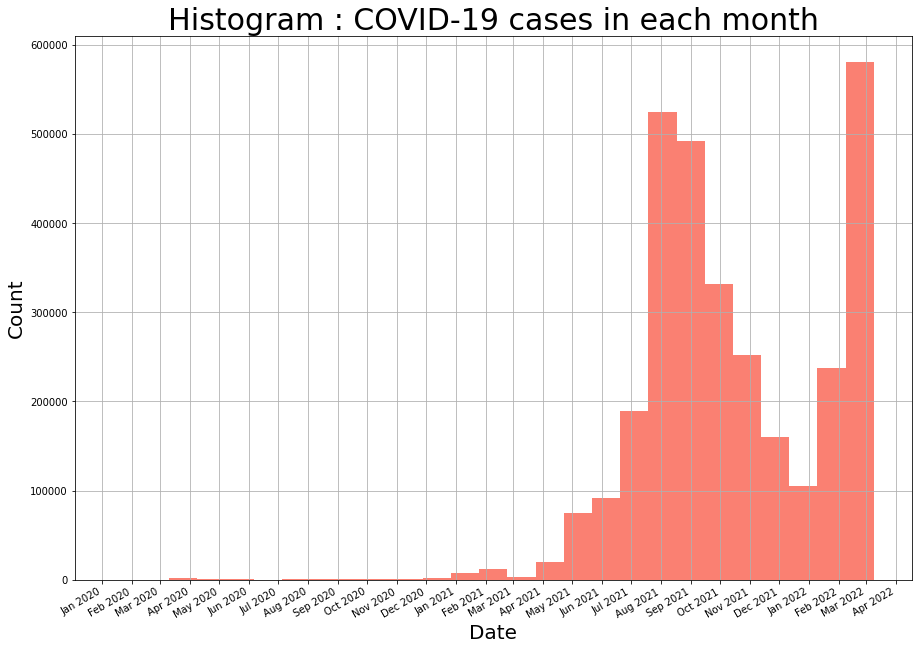

In [106]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(df['new_date'], bins = 27, color = 'salmon')

# Define the date format
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax.set_xlabel('Date', fontsize=20, color='black')
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Histogram : COVID-19 cases in each month', fontsize=30)

plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
ax.grid(True)
plt.style.use('seaborn-bright')
plt.show()

In [107]:
#for style in plt.style.available:
    #print(style)

### คนที่เดินทางมาจากต่างประเทศ คนชาติใดเป็น covid มากสุด และคนต่างชาติ ชาติใด ติดโควิดมากที่สุด 5 อันดับแรก

In [108]:
df[df['new_risk'] == 'ผู้ที่เดินทางมาจากต่างประเทศ']['nationality'].value_counts()

Thai        6441
British      672
Burmese      571
            ... 
Malian         1
Maltese        1
Bruneian       1
Name: nationality, Length: 122, dtype: int64

In [109]:
nat_df = df[df['new_risk'] == 'ผู้ที่เดินทางมาจากต่างประเทศ']['nationality'].value_counts()

In [110]:
fig = px.bar(nat_df, x=nat_df.index, y=nat_df.values, 
                labels={
                     'index' : "Nationality",
                     'y' : "Count"
                 },
                title="COVID-19 confirm cases who came from abroad")
fig.show()

### คนจังหวัดอะไรติดโควิดเยอะสุด 5 อันดับแรก

In [111]:
df['province_of_onset'].value_counts().head(5)

กรุงเทพมหานคร    540738
สมุทรปราการ      176479
ชลบุรี           163346
สมุทรสาคร        115252
นนทบุรี          110883
Name: province_of_onset, dtype: int64

### ผู้ชายหรือผู้หญิงติดโควิดมากกว่ากัน

In [112]:
df['sex'] = df['sex'].replace(['หญิง'], 'female')
df['sex'] = df['sex'].replace(['ชาย'], 'male')

In [113]:
df['sex'].value_counts()

female    1534775
male      1384678
Name: sex, dtype: int64

In [130]:
df['sex'].value_counts(normalize=True)

female    0.525706
male      0.474294
Name: sex, dtype: float64

In [143]:
#df_s = df['sex'].value_counts()
#print('female percent :', round(df_s[0] / df_s.sum()*100), '%')
#print('male percent :', round(df_s[1] / df_s.sum()*100), '%')

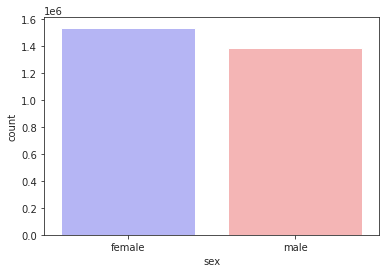

In [114]:
sns.set_style('ticks')
sns.countplot(x='sex',data= df, palette='bwr')
plt.show()

# Insight Question

### คิดว่าตั้งแต่มีการระบาดของโรคโควิดในประเทศไทย ถ้ามีงบประมาณอยู่ก้อนนึง แล้วต้องการเพิ่มเตียงและบุคลกรณ์ทางการแพทย์ให้จังหวัดใดจังหวัดนึงได้ ควรเพิ่มในจังหวัดไหนมากที่สุด

In [115]:
df[df['province_of_isolation'] != df['province_of_onset']]['province_of_onset'].value_counts().head()

กรุงเทพมหานคร    79600
ปทุมธานี         27731
สมุทรปราการ      26101
นนทบุรี          22634
นครปฐม           19757
Name: province_of_onset, dtype: int64

In [116]:
df_bkk = df[df['province_of_onset'] == 'กรุงเทพมหานคร']

In [117]:
df_bkk[df_bkk['province_of_isolation'] != df_bkk['province_of_onset']]['province_of_isolation'].value_counts()

สมุทรปราการ    28854
นนทบุรี         9306
อุบลราชธานี     7187
               ...  
ระนอง              3
อุทัยธานี          2
เพชรบูรณ์          2
Name: province_of_isolation, Length: 76, dtype: int64

In [132]:
fig = px.sunburst(df.dropna(subset=['province_of_onset', 'province_of_isolation']), path=['province_of_onset', 'province_of_isolation'])
fig.show()

### ในช่วงสงกรานต์ที่จะถึง ถ้าออกแคมเปญเรื่องโควิดได้ ควรเน้นไปที่กลุ่มอายุไหน ในเรื่องใดเป็นพิเศษ

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



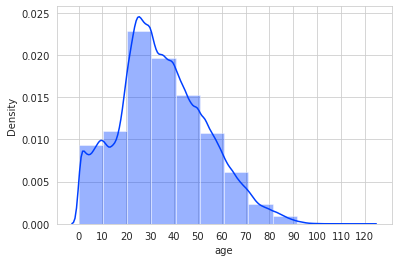

In [119]:
sns.set_style('whitegrid')
sns.distplot(df['age'], bins = 12)
plt.xticks(range(0,121,10))
plt.show()

In [120]:
''' import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['age'], bins = 12)
plt.xticks(range(0,121,10))
plt.show() '''

" import matplotlib.pyplot as plt\nfig = plt.figure()\nax = fig.add_subplot(111)\nax.hist(df['age'], bins = 12)\nplt.xticks(range(0,121,10))\nplt.show() "

In [121]:
df[(df['age'] >= 20) & (df['age'] <= 40)]['new_risk'].value_counts().head(7)

สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้         522086
อื่นๆ                                               327796
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน    111307
อยู่ระหว่างการสอบสวน                                110214
สถานที่ทำงาน                                         56240
ทัณฑสถาน/เรือนจำ                                     44027
ไปสถานที่เสี่ยง                                      36947
Name: new_risk, dtype: int64

-------------------

### ถ้าเพื่อนคุณมาจากต่างประเทศ ต้องการไปเที่ยวภาคใดภาคหนึ่งของประเทศไทย เขาควรเลือกไปเที่ยวภาคไหน ซึ่งเขาเป็นคนที่กังวลเรื่องโควิดค่อนข้างมาก

In [122]:
northern = ['เชียงราย', 'เชียงใหม่', 'น่าน', 'พะเยา', 'แพร่', 'แม่ฮ่องสอน', 'ลำปาง', 'ลำพูน', 'อุตรดิตถ์']
northeastern = ['กาฬสินธุ์', 'ขอนแก่น', 'ชัยภูมิ', 'นครพนม', 'นครราชสีมา', 'บึงกาฬ', 'บุรีรัมย์', 'มหาสารคาม', 'มุกดาหาร', 
                'ยโสธร', 'ร้อยเอ็ด', 'เลย', 'สกลนคร', 'สุรินทร์', 'ศรีสะเกษ', 'หนองคาย', 'หนองบัวลำภู', 'อุดรธานี', 'อุบลราชธานี', 'อำนาจเจริญ']
central = ['กรุงเทพมหานคร','กำแพงเพชร','ชัยนาท','นครนายก','นครปฐม','นครสวรรค์','นนทบุรี','ปทุมธานี','พระนครศรีอยุธยา','พิจิตร',
           'พิษณุโลก','เพชรบูรณ์','ลพบุรี','สมุทรปราการ','สมุทรสงคราม','สมุทรสาคร','สิงห์บุรี','สุโขทัย','สุพรรณบุรี','สระบุรี','อ่างทอง','อุทัยธานี']
eastern = ['จันทบุรี','ฉะเชิงเทรา','ชลบุรี','ตราด','ปราจีนบุรี','ระยอง','สระแก้ว']
western = ['กาญจนบุรี','ตาก','ประจวบคีรีขันธ์','เพชรบุรี','ราชบุรี']
southern = ['กระบี่','ชุมพร','ตรัง','นครศรีธรรมราช','นราธิวาส','ปัตตานี','พังงา','พัทลุง','ภูเก็ต','ระนอง','สตูล','สงขลา','สุราษฎร์ธานี','ยะลา']

In [123]:
# create a list of our conditions
conditions = [
    (df['province_of_onset'].isin(northern)),
    (df['province_of_onset'].isin(northeastern)), 
    (df['province_of_onset'].isin(central)),
    (df['province_of_onset'].isin(eastern)), 
    (df['province_of_onset'].isin(western)), 
    (df['province_of_onset'].isin(southern)), 
]

# create a list of the values we want to assign for each condition
values = ['Northern', 'Northeastern', 'Central', 'Eastern', 'Western', 'Southern']

# create a new column and use np.select to assign values to it using our lists as arguments
df['region'] = np.select(conditions, values, default = None)

# display updated DataFrame
df['region'].value_counts()

Central         1371909
Southern         474119
Eastern          381356
Northeastern     249680
Western          146549
Northern          87868
Name: region, dtype: int64

In [124]:
df_reg = df['region'].value_counts()

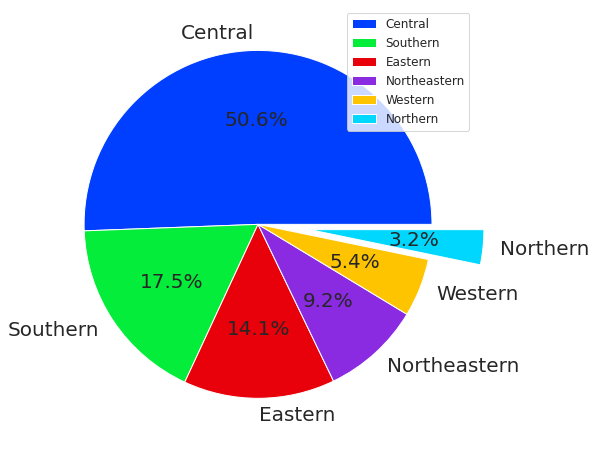

In [125]:
plt.figure(figsize=(10, 8))
y = df_reg.values
mylabels = df_reg.index
myexplode = [0, 0, 0, 0, 0, 0.3]

plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.legend(loc = 1, fontsize = 12)
plt.show() 

In [126]:
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111)
#y = df_reg.values
#ax.pie(y, labels=mylabels, autopct='%1.1f%%', textprops={'fontsize': 20})
#plt.legend(loc=1 ,prop={'size': 15})
#plt.title('Thailand region', fontsize = 20)
#plt.show()

# export Data

In [127]:
''' from google.colab import files
df.to_csv('datacovid.csv') 
files.download('datacovid.csv') '''

" from google.colab import files\ndf.to_csv('datacovid.csv') \nfiles.download('datacovid.csv') "